<b>Vinicius F. Caridá</b>

<h1 style="text-align:center"> Machine Learning Hands-On </h1>

<h3 class="title"> Links úteis: </h3>
<br>
<ol>
  <li class="item"><a href = "http://scikit-learn.org/stable/"> Sklearn</a>: principal biblioteca de aprendizado de máquina para python.</li>
  <li class="item"><a href = "http://pandas.pydata.org/pandas-docs/stable/"> Pandas</a>: (quase) tudo o que você precisa para trabalhar rapidamente com tabelas</li>
  <li class="item"><a href = "https://docs.scipy.org/doc/numpy/reference/index.html"> Numpy</a>: funções matemáticas estão aqui</li>
  <li class="item"><a href = "https://matplotlib.org/contents.html"> Matplotlib</a>: te ajuda a plotar!</li>
  <li class="item"><a href = "https://seaborn.pydata.org/api.html"> Seaborn</a>: Deixa a matplotlib bonita (contém plots mais bem estruturados)</li>
</ol>

<b>Trabalharemos com as seguintes bases de dados:</b>
- iris.csv
- lenses_final.csv
- car.data
- horse-colic.data
- PETR4.SA.csv
- Boston.csv
- artificial_data

<b>Testem a leitura de um dos arquivos deste curso</b>
- Acessem a documentação da função <i>read_csv</i> do <i>pandas</i>: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html

In [1]:
import numpy as np 
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid', {"axes.grid" : False})
sns.set_context('notebook')
np.random.seed(42)

In [2]:
iris            = pd.read_csv("./data/iris.csv")
lenses          = pd.read_csv("./data/lenses_final.csv")
car             = pd.read_csv("./data/cars.csv")
horsecolic      = pd.read_table("./data/horse-colic.data")

C:\Users\vinicius\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  after removing the cwd from sys.path.


<h2 style="text-align:center; margin:40px"> Redes Neurais </h2>

![](img/nn1.png)

O algoritmo de <b>Redes Neurais Artificiais</b> trabalha com abstrações inspiradas em neurônios biológicos. Cada neurônio artificial:
<ul>
    <li>Recebe <b>diversas entradas</b>, onde cada conexão $x_i$ está associada à um peso $w_i$</li>
    <li>Produz <b>somente uma saída</b>, dada pelo output de uma <b>função de ativação</b></li>
    <li>O conhecimento fica armazenado nos pesos $w_i$</li>
</ul>

<br/>
<h3> Arquitetura: </h3>
Uma rede neural é dividida em 3 tipos de camada:
<ul>
    <li>Camadas de <b>input</b></li>
    <li>Camadas <b>intermediárias</b> ou ocultas</li>
    <li>Uma única camada de <b>output</b></li>
</ul>

<br/>
<h3> Predição (Forward Step): </h3>
Os dados de entrada "fluem" pela arquitetura da rede, sendo multiplicados em cada camada pelos respectivos pesos.

<ul>
    <li>$H_1 = f_1(W_1^TX)$</li>
    <li>$H_2 = f_2(W_2^TH_1)$</li>
    <li>$...$</li>
    <li>$Output = f_{output}(W_{output}^TH_n)$</li>
</ul>

<br/>
<h3> Aprendizado (Back Propagation): </h3>
Após uma predição incorreta, os erros "fluem de volta" começando pela camada de output, e corrigindo os pesos a cada passo de modo que eles se adaptem melhor aos dados.

<ul>
    <li>$w_{ij} := w_{ij} - \alpha \, \frac{\partial J}{\partial w_{ij}}$</li>
</ul>

<br/>
<h3> <font color="red">Atenção:</font> Os dados devem ser normalizados antes do treinamento, ou podemos correr o risco de estourar ou zerar os gradientes, fazendo com que a rede não treine!</h3>

<br/>
<h3> Arquiteturas Populares (Deep Learning): </h3>
<ul>
    <li><b>Redes Densas (MLPs):</b> Mais usada com dados estruturados</li>
    <li><b>Redes Convolucionais (CNNs):</b> Tratamento de imagens e dados com características espaciais</li>
    <li><b>Redes Recorrentes (RNNs):</b> Tratamento de sequências (ex: texto)</li>
    <li><b>Redes Generativas Adversárias (GANs):</b> Geração de dados artificiais e aprendizado semi-supervisionado</li>
</ul>

<br/>
<h3> Hiperparâmetros </h3>
Redes neurais geralmente são mais difíceis de treinar pois existem muitos parâmetros que podem ser tunados, e geralmente é inviável testar uma grande quantidade de parâmetros pois o treinamento da rede é muito custoso.

<ul>
    <li>Taxa de aprendizado ($\alpha$)</li>
    <li>Número de camadas ocultas</li>
    <li>Tamanho de cada camada oculta</li>
    <li>(CNNs) Tamanho do Kernel</li>
    <li>(CNNs) Tamanho dos strides</li>
    <li>...</li>
</ul>

<h3> Scikit-Learn </h3>
Agora, vamos rodar os códigos abaixo que usam uma implementação do algoritmo disponível no pacote <i>sklearn</i> (Scikit-Learn). O ideal para trabalharmos com Redes Neurais é utilizar os pacotes específicos como <b>TensorFlow</b> e <b>Keras</b>, pois eles nos dão mais liberdade e possuem várias funcionalidades já prontas.

In [11]:
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression

In [14]:
MLP = MLPClassifier(activation = 'relu',
                    hidden_layer_sizes = (40, 20, 10),
                    max_iter = 5000)
baseDados = pd.read_csv('data/base_svm.csv')
X = baseDados.loc[:, baseDados.columns != 'Y']
Y = baseDados.Y
MLP.fit(X,Y)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(40, 20, 10), learning_rate='constant',
       learning_rate_init=0.001, max_iter=5000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

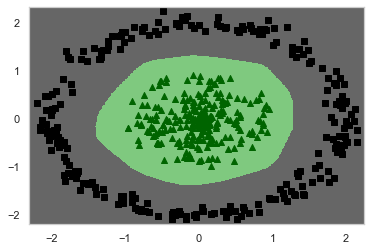

In [15]:
x_min, x_max = baseDados.X1.min() - .1, baseDados.X1.max() + .1
y_min, y_max = baseDados.X2.min() - .1, baseDados.X2.max() + .1
h = .01
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = MLP.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap = plt.cm.Accent)

pred = MLP.predict(X)
plt.scatter(baseDados.X1[Y == 0], baseDados.X2[Y == 0], c = 'darkgreen', marker = '^')
plt.scatter(baseDados.X1[Y == 1], baseDados.X2[Y == 1], c = 'black', marker = ',')